In [1]:
# %cd /home/afischer/snakeclef-2024
# ! sudo pip install -r requirements.txt

/home/afischer/snakeclef-2024


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Defaulting to user installation because normal site-packages is not writeable


In [2]:
img_path = '/mnt/data/SnakeCLEF2023-small_size'
img_year = '2023'
img_species = 'Acanthophis_antarcticus'
img_file = '250558438.jpeg'

img_filename = '/'.join([img_path, img_year, img_species, img_file])
img_filename

'/mnt/data/SnakeCLEF2023-small_size/2023/Acanthophis_antarcticus/250558438.jpeg'

(135, 240, 3)


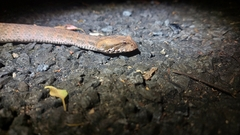

In [3]:
from PIL import Image
import numpy as np

image = Image.open(img_filename)
print(np.asarray(image).shape)
image

In [4]:
from transformers import pipeline

checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [5]:
predictions = detector(
    image,
    candidate_labels=["snake"],
)

In [6]:
predictions

[{'score': 0.1926068812608719,
  'label': 'snake',
  'box': {'xmin': 0, 'ymin': 18, 'xmax': 138, 'ymax': 57}}]

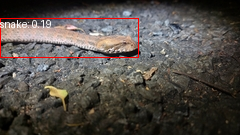

In [7]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image

# Looped

In [8]:
def zero_shot_bounding_box(image, candidate_labels=['snake'], detector=detector):

    predictions = detector(
        image,
        candidate_labels=candidate_labels,
    )
    
    draw = ImageDraw.Draw(image)

    for prediction in predictions:
        box = prediction["box"]
        label = prediction["label"]
        score = prediction["score"]

        xmin, ymin, xmax, ymax = box.values()
        draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
        draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

    return image, predictions

In [9]:
import os

def list_files(directory):
    files_list = []
    
    for root, dirs, files in os.walk(directory):
        for file in files:
            files_list.append(os.path.join(root, file))
    
    return files_list

# Usage
directory_path = '/mnt/data/SnakeCLEF2023-small_size/2023'
img_filenames = list_files(directory_path)
len(img_filenames)


2186

In [13]:
#label candidates taken from the ImageNet 1000 training labels
label_candidates = """snake, thunder snake, worm snake, Carphophis amoenus
ringneck snake, ring-necked snake, ring snake
hognose snake, puff adder, sand viper
green snake, grass snake
king snake, kingsnake
garter snake, grass snake
water snake
vine snake
night snake, Hypsiglena torquata
boa constrictor, Constrictor constrictor
rock python, rock snake, Python sebae
Indian cobra, Naja naja
green mamba
sea snake
horned viper, cerastes, sand viper, horned asp, Cerastes cornutus
diamondback, diamondback rattlesnake, Crotalus adamanteus
sidewinder, horned rattlesnake, Crotalus cerastes""".replace('\n', ',').split(',')
label_candidates = [l.strip() for l in label_candidates]

# label_candidates = ['snake']

label_candidates

['thunder snake',
 'worm snake',
 'Carphophis amoenus',
 'ringneck snake',
 'ring-necked snake',
 'ring snake',
 'hognose snake',
 'puff adder',
 'sand viper',
 'green snake',
 'grass snake',
 'king snake',
 'kingsnake',
 'garter snake',
 'grass snake',
 'water snake',
 'vine snake',
 'night snake',
 'Hypsiglena torquata',
 'boa constrictor',
 'Constrictor constrictor',
 'rock python',
 'rock snake',
 'Python sebae',
 'Indian cobra',
 'Naja naja',
 'green mamba',
 'sea snake',
 'horned viper',
 'cerastes',
 'sand viper',
 'horned asp',
 'Cerastes cornutus',
 'diamondback',
 'diamondback rattlesnake',
 'Crotalus adamanteus',
 'sidewinder',
 'horned rattlesnake',
 'Crotalus cerastes']

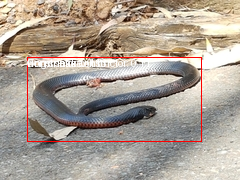

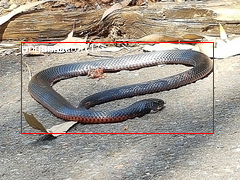

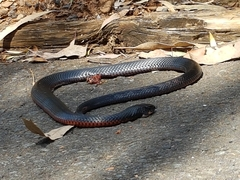

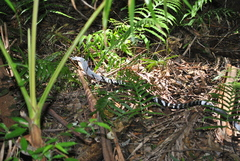

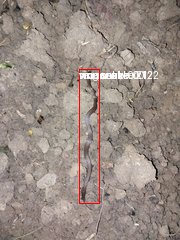

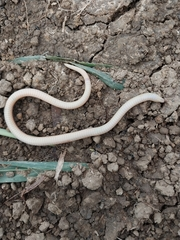

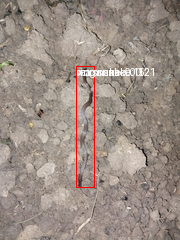

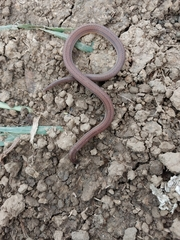

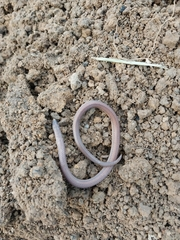

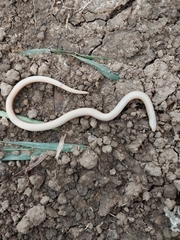

{'/mnt/data/SnakeCLEF2023-small_size/2023/Pseudechis_porphyriacus/251094703.jpeg': {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x180>,
  'predictions': [{'score': 0.13184385001659393,
    'label': 'worm snake',
    'box': {'xmin': 27, 'ymin': 57, 'xmax': 201, 'ymax': 141}},
   {'score': 0.1125217005610466,
    'label': 'ring snake',
    'box': {'xmin': 27, 'ymin': 57, 'xmax': 201, 'ymax': 141}},
   {'score': 0.11095727980136871,
    'label': 'Constrictor constrictor',
    'box': {'xmin': 27, 'ymin': 57, 'xmax': 201, 'ymax': 141}}]},
 '/mnt/data/SnakeCLEF2023-small_size/2023/Pseudechis_porphyriacus/251098477.jpeg': {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x180>,
  'predictions': [{'score': 0.16997134685516357,
    'label': 'worm snake',
    'box': {'xmin': 21, 'ymin': 42, 'xmax': 213, 'ymax': 133}},
   {'score': 0.11130330711603165,
    'label': 'ring snake',
    'box': {'xmin': 21, 'ymin': 42, 'xmax': 213, 'ymax': 133}}]},
 '/mnt/data/S

In [14]:
from IPython.display import display


outputs = {}
for img_filename in img_filenames[:10]:
    image = Image.open(img_filename)
    
    image, predictions = zero_shot_bounding_box(image, label_candidates, detector=detector)

    display(image)

    outputs[img_filename] = {'image':image, 'predictions':predictions}
    print(outputs[img_filename])


Unidentified snake count: 6
Identified snake count: 6


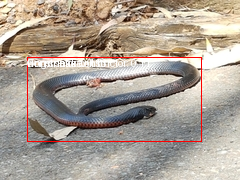

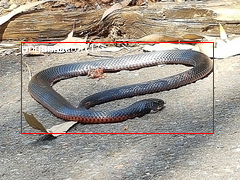

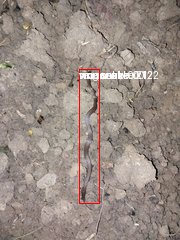

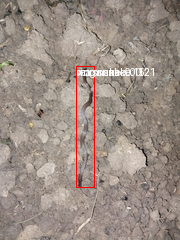

In [15]:
from IPython.display import display

unlabeled_images = [o['image'] for o in outputs.values() if o['predictions']==[]]
print(f"Unidentified snake count: {len(unlabeled_images)}")

labeled_images = [o['image'] for o in outputs.values() if o['predictions']!=[]]
print(f"Identified snake count: {len(unlabeled_images)}")
labeled_images
for labeled_image in labeled_images:
    display(labeled_image)
